## reference (prediction with only close)

In [1]:
import pandas as pd

data = pd.read_csv('data_sample_three_years.csv')

data = data.iloc[:, [0,2,3,4]]
data.rename(columns={'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data['close+'] = data['close'].shift(1)
data.dropna(axis=0, inplace=True)

inputs = data.iloc[:, [3]]
target = data.iloc[:, [4]]

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=1, shuffle=False)

regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [3]:
pred = regressor.predict(X_test)
y_test['pred'] = pred

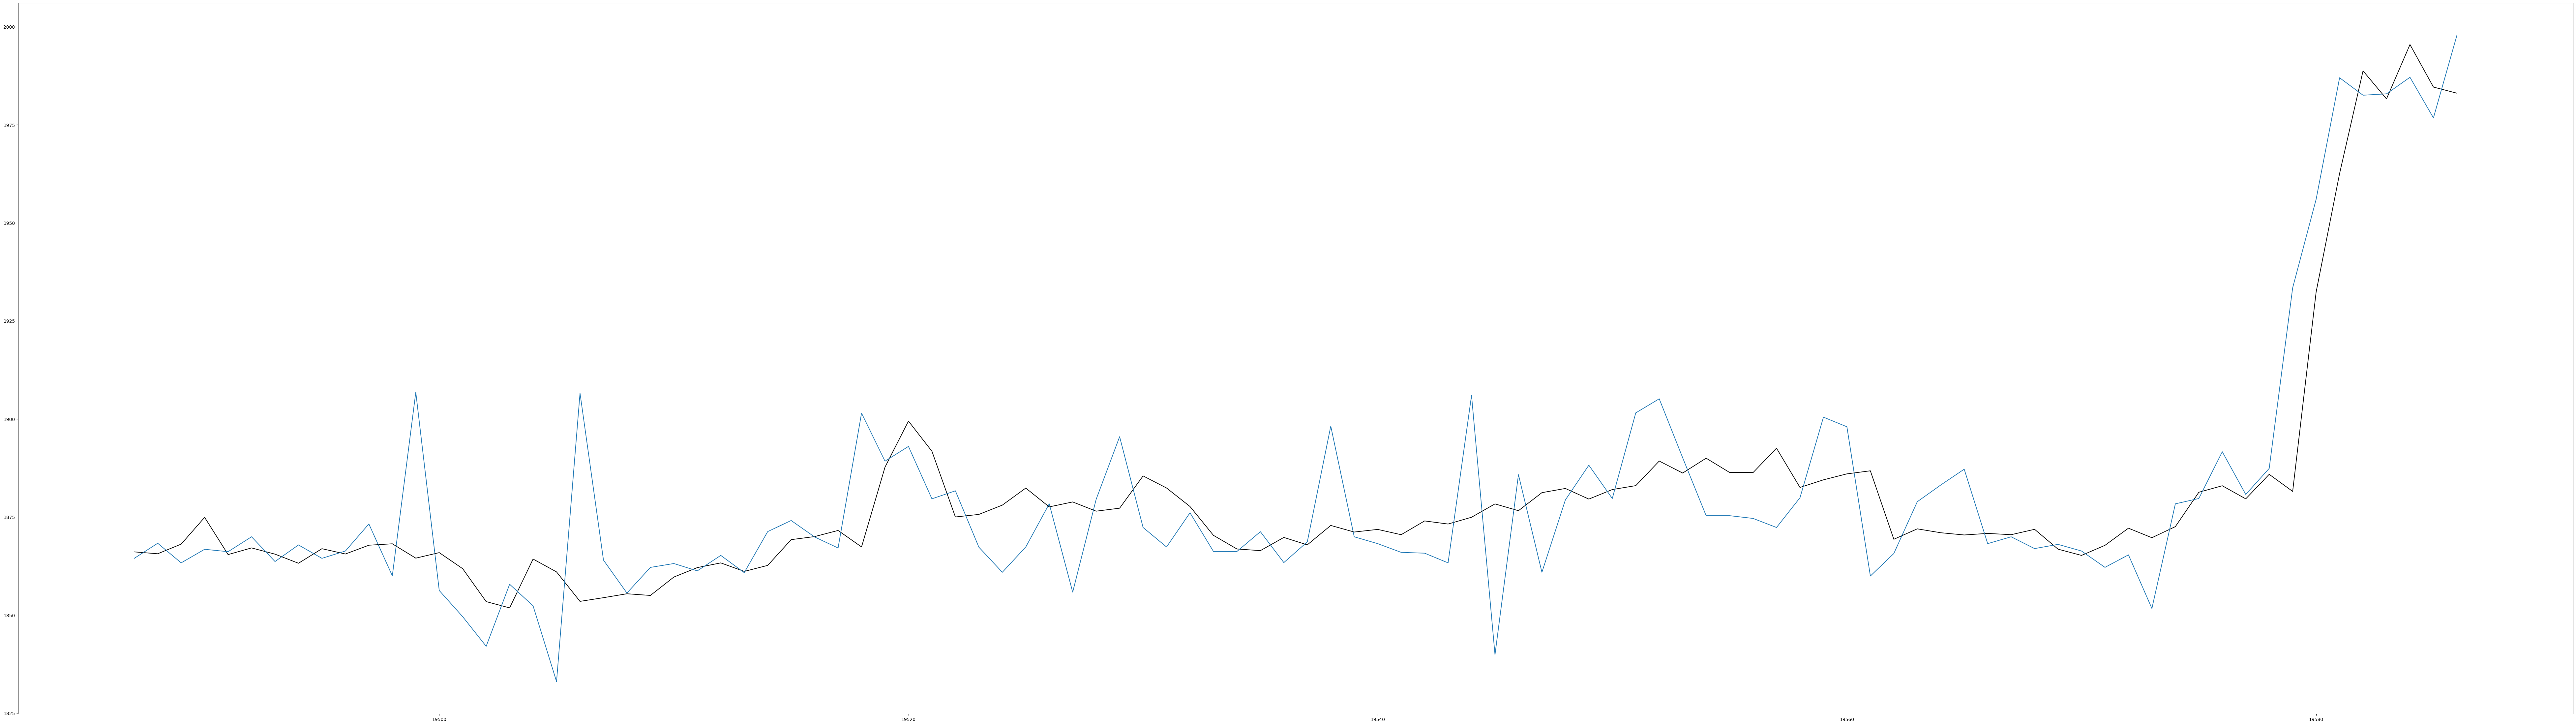

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test['close+'].iloc[:100], color='black')
plt.plot(y_test['pred'].iloc[:100])
plt.show()

## prediction with ma & rsi

In [5]:
import pandas as pd

data2 = pd.read_csv('data_sample_three_years.csv')

data2 = data2.iloc[:, [0,2,3,4]]
data2.rename(columns={'low':'close', 'open':'high', 'high':'low'}, inplace=True)

from talib import RSI
data2['rsi'] = RSI(data2['close'])

from talib import MA, SMA, EMA
data2['ma'] = MA(data2['close'])

In [6]:
data2['close+'] = data2['close'].shift(1)
#data['rsi+'] = data['rsi'].shift(1)
#data['ma+'] = data['ma'].shift(1)

In [7]:
data2.dropna(axis=0, inplace=True)

In [8]:
inputs2 = data2.iloc[:, [3,4,5]]
target2 = data2.iloc[:, [6]]

In [13]:
inputs2

,close,rsi,ma
29,1760.23,60.726497,1710.117667
30,1751.09,58.774198,1715.234333
31,1736.78,55.752107,1720.006667
32,1744.33,57.008134,1725.372667
33,1754.75,58.748543,1729.864333
...,...,...,...
24354,2438.64,79.375495,2374.780000
24355,2429.71,73.149791,2377.675333
24356,2424.75,69.871719,2380.293333
24357,2424.22,69.513250,2382.667333


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs2, target2, test_size=0.2, random_state=1, shuffle=False)

regressor2 = DecisionTreeRegressor(random_state=1)
regressor2.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=1)

In [10]:
pred2 = regressor2.predict(X_test2)
y_test2['pred'] = pred2

In [11]:
y_test2

,close+,pred
19493,1865.52,1860.43
19494,1863.20,1867.98
19495,1866.91,1868.09
19496,1865.56,1867.09
19497,1867.80,1868.62
...,...,...
24354,2418.66,2452.10
24355,2438.64,2383.81
24356,2429.71,2383.81
24357,2424.75,2383.81


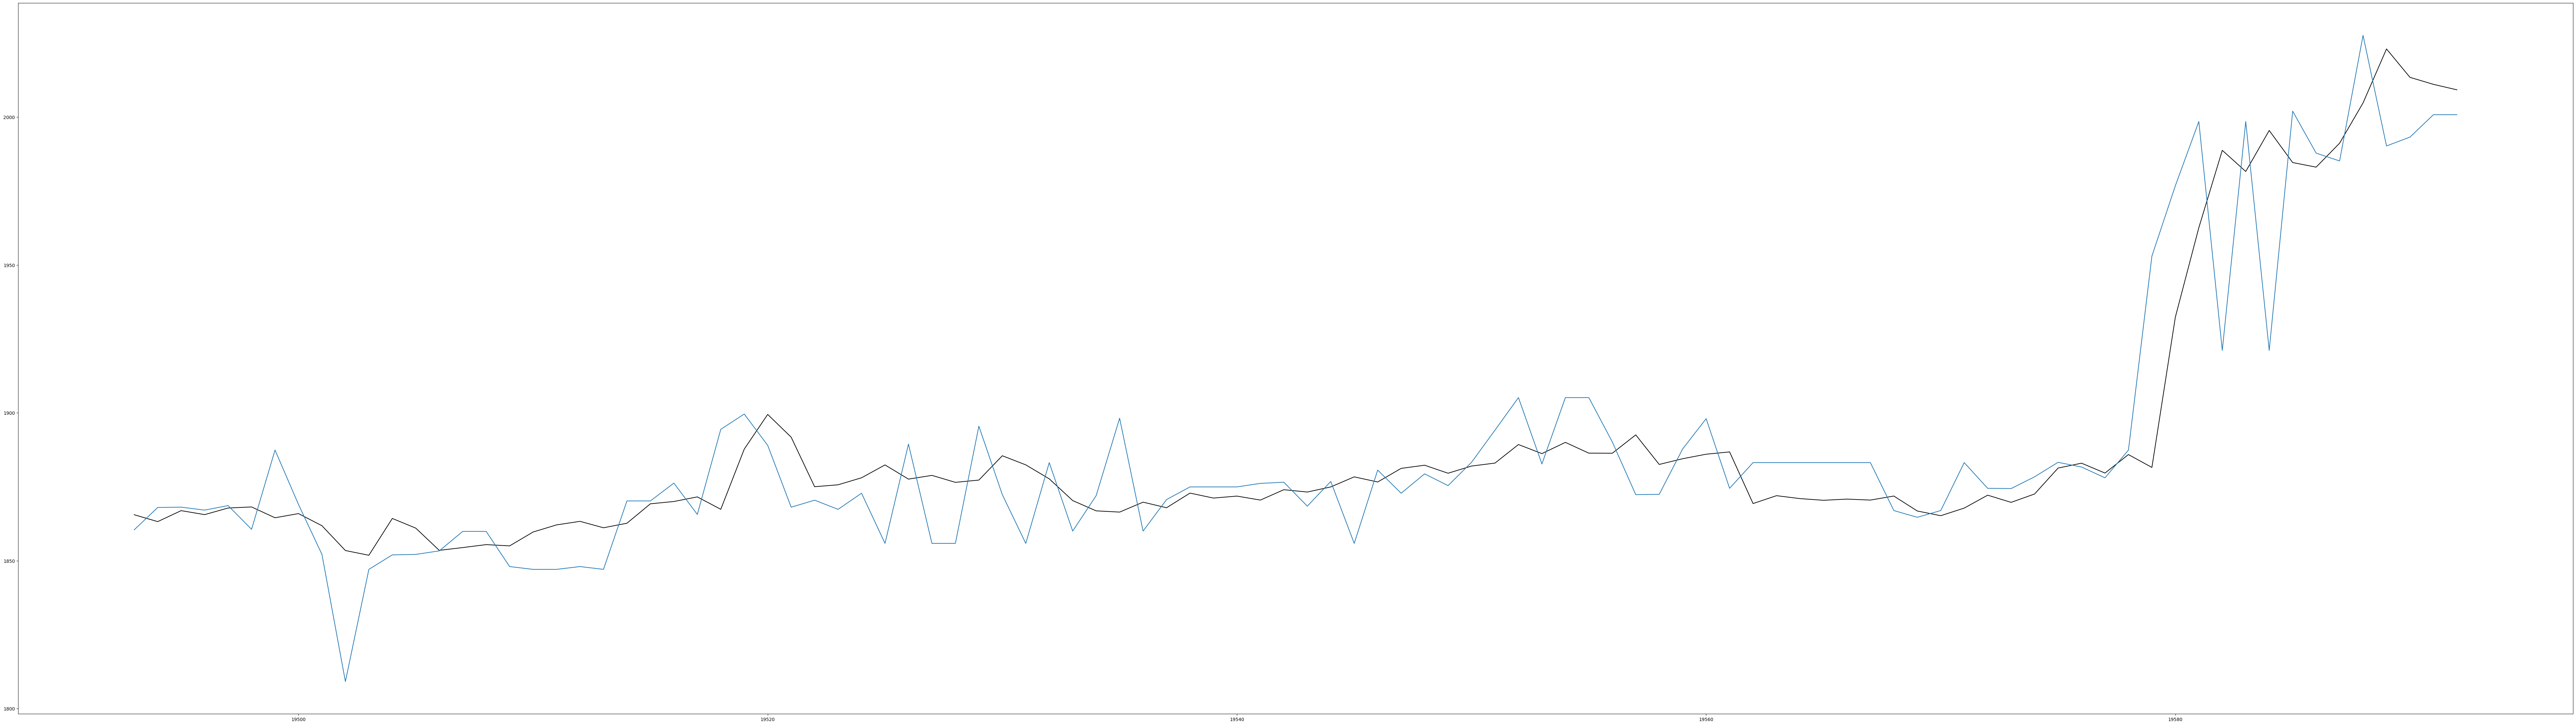

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test2['close+'].iloc[:100], color='black')
plt.plot(y_test2['pred'].iloc[:100])
plt.show()